# Project Title: Exploring Global Development with Gapminder

**Goal**: Use Python to explore and understand how countries around the world have changed over time in terms of health, wealth, and population.

We’ll use tools like `pandas` to look at data and `matplotlib` & `seaborn` to make cool charts that help us see trends and patterns.

---

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For getting the dataset easily

## Task 1: Load and Explore the Dataset
We'll start by getting the data and seeing what it looks like. This data comes from Gapminder, which tracks how countries develop over time.

In [24]:
# Load the Gapminder dataset
df = px.data.gapminder()
df.head()  # Show the first few rows

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


This shows us information like:
- The year
- Country name
- Continent
- Life expectancy (how long people live)
- Population
- GDP per person (how rich people are on average)

In [25]:
# Check the types of data and look for missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


,0
country,0
continent,0
year,0
lifeExp,0
pop,0
gdpPercap,0
iso_alpha,0
iso_num,0


Now we’ll clean the data just in case anything is missing or broken.

In [26]:
# Clean the dataset (remove missing data if any)
df_clean = df.dropna()

## Task 2: Basic Data Analysis
Let’s find some simple stats to understand our data better.

In [27]:
# Get stats like average, min, max for numbers
df_clean.describe()

,year,lifeExp,pop,gdpPercap,iso_num
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,425.880282
std,17.26533,12.917107,1.061579e+08,9857.454543,248.305709
min,1952.00000,23.599000,6.001100e+04,241.165876,4.000000
25%,1965.75000,48.198000,2.793664e+06,1202.060309,208.000000
50%,1979.50000,60.712500,7.023596e+06,3531.846989,410.000000
75%,1993.25000,70.845500,1.958522e+07,9325.462346,638.000000
max,2007.00000,82.603000,1.318683e+09,113523.132900,894.000000


This tells us things like:
- The average life expectancy
- The largest and smallest population sizes
- The average GDP per person

In [28]:
# What is the average life expectancy per continent?
avg_life_exp = df_clean.groupby('continent')['lifeExp'].mean().sort_values(ascending=False)
print(avg_life_exp)

continent
Oceania     74.326208
Europe      71.903686
Americas    64.658737
Asia        60.064903
Africa      48.865330
Name: lifeExp, dtype: float64


In [29]:
# What is the average GDP per person per continent?
avg_gdp = df_clean.groupby('continent')['gdpPercap'].mean().sort_values(ascending=False)
print(avg_gdp)

continent
Oceania     18621.609223
Europe      14469.475533
Asia         7902.150428
Americas     7136.110356
Africa       2193.754578
Name: gdpPercap, dtype: float64


### What we can see:
- Europe has the highest average life expectancy and income.
- Africa is the lowest in both.
- Some parts of the world are developing faster than others.

## Task 3: Data Visualization
Now let’s make some charts to better understand the trends and differences!

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


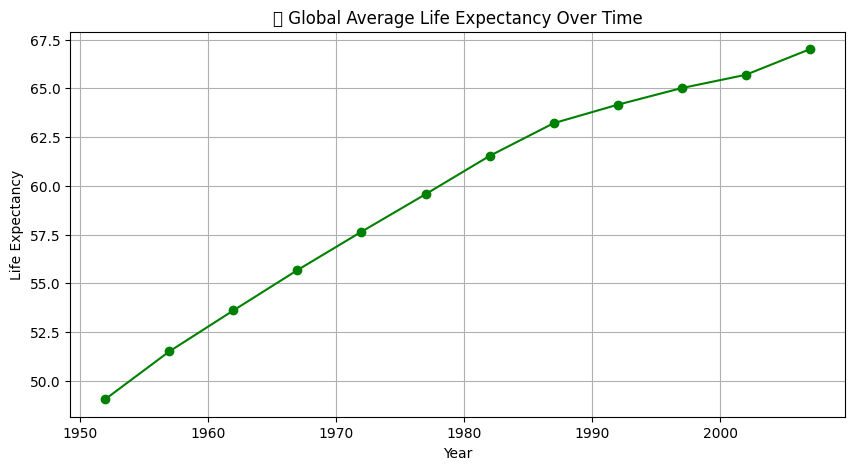

In [30]:
# Line chart – Global life expectancy over time
global_trend = df_clean.groupby('year')['lifeExp'].mean()

plt.figure(figsize=(10, 5))
plt.plot(global_trend, marker='o', color='green')
plt.title('🌍 Global Average Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

This chart shows that people around the world are living longer over the years!

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


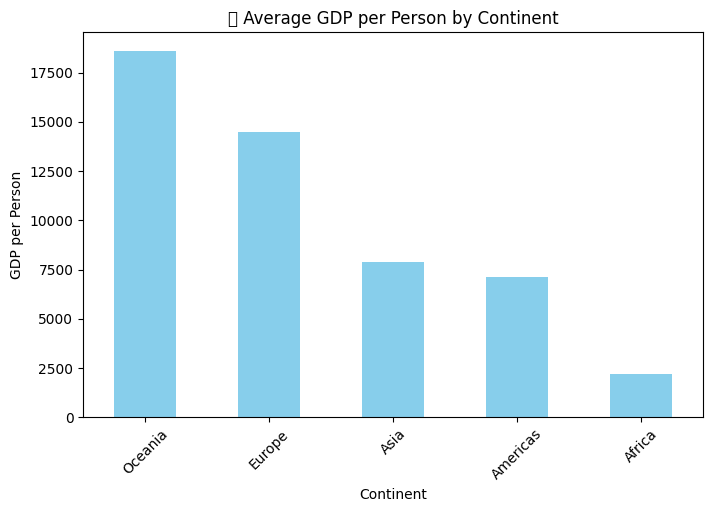

In [31]:
# Bar chart – Average GDP per person by continent
plt.figure(figsize=(8, 5))
avg_gdp.plot(kind='bar', color='skyblue')
plt.title('💰 Average GDP per Person by Continent')
plt.ylabel('GDP per Person')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.show()

This bar chart shows how much money people make on average in each continent.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


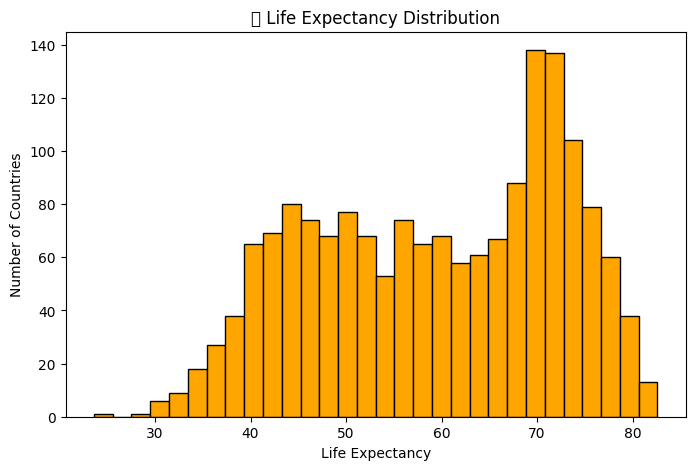

In [32]:
# Histogram – Life expectancy distribution
plt.figure(figsize=(8, 5))
plt.hist(df_clean['lifeExp'], bins=30, color='orange', edgecolor='black')
plt.title('📊 Life Expectancy Distribution')
plt.xlabel('Life Expectancy')
plt.ylabel('Number of Countries')
plt.show()

Most countries have a life expectancy between 60 and 80 years.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


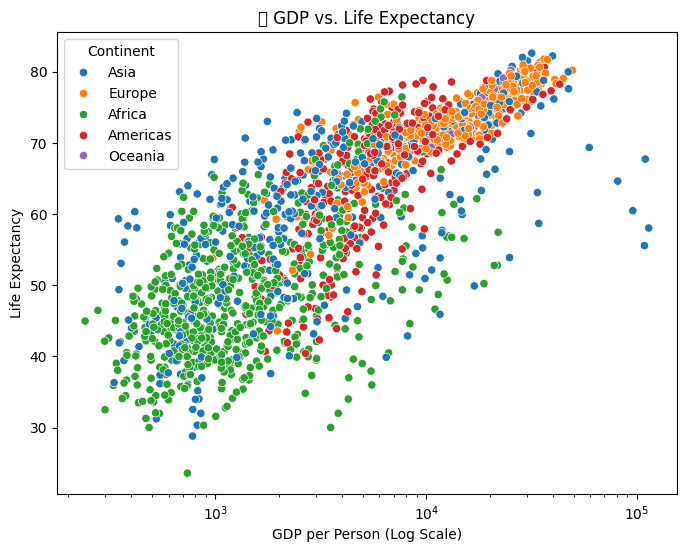

In [33]:
# Scatter plot – GDP vs Life Expectancy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gdpPercap', y='lifeExp', hue='continent', data=df_clean)
plt.title('🧬 GDP vs. Life Expectancy')
plt.xlabel('GDP per Person (Log Scale)')
plt.ylabel('Life Expectancy')
plt.xscale('log')
plt.legend(title='Continent')
plt.show()

Countries with more money (GDP per person) usually have longer life expectancies.

## Summary
- The world is improving in health — people are living longer.
- Richer continents also tend to have longer life expectancies.
- There's a big gap between continents, showing that some need more support to grow.